In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn import datasets

In [2]:
digits = datasets.load_digits()

In [3]:
def browse_images(digits):
    n = len(digits.images)
    def view_image(i):
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %s' % digits.target[i])
        plt.show()
    interact(view_image, i=(0,n-1))

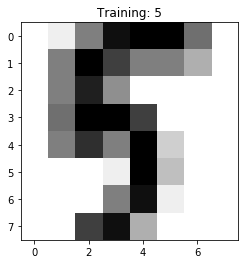

In [4]:
browse_images(digits)

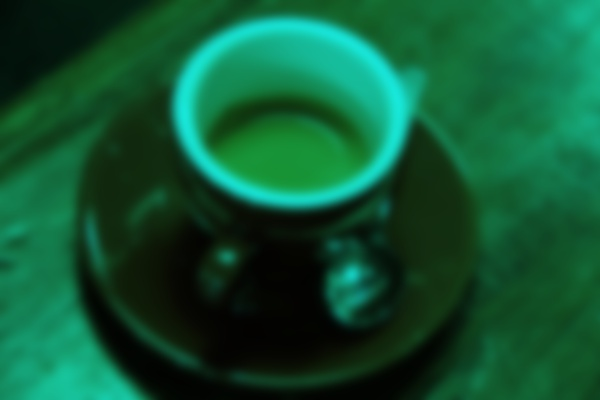

In [5]:
# Stdlib imports
from io import BytesIO

# Third-party libraries
from IPython.display import Image
from ipywidgets import interact, interactive, fixed
import matplotlib as mpl
from skimage import data, filters, io, img_as_float
import numpy as np
i = img_as_float(data.coffee())
i.shape
def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return Image(out)
arr2img(i)
def edit_image(image, sigma=0.1, R=1.0, G=1.0, B=1.0):
    new_image = filters.gaussian_filter(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = R*new_image[:,:,0]
    new_image[:,:,1] = G*new_image[:,:,1]
    new_image[:,:,2] = B*new_image[:,:,2]
    return arr2img(new_image)
edit_image(i, sigma=5, R=0.1)

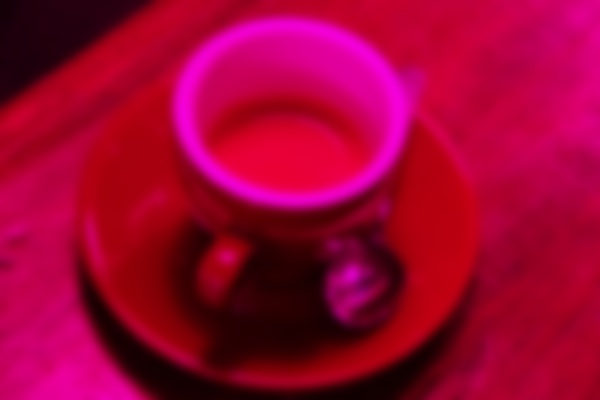

In [6]:
lims = (0.0,1.0,0.01)
interact(edit_image, image=fixed(i), sigma=(0.0,10.0,0.1), R=lims, G=lims, B=lims);

NameError: name 'sigma' is not defined